In [1]:
import re
import sys
from time import sleep
from pprint import pprint
from functools import partial

import numpy as np
import optuna
try:
    import pandas as pd
except:
    pass


FILENAME = "ensemble2_select_best.cpp"

In [2]:
!cp ../main.cpp ./{FILENAME}

In [3]:
!g++ {FILENAME} -std=gnu++17 -Wall -Wextra -O2 -DONLINE_JUDGE -o {FILENAME}.out

ensemble2_select_best.cpp:457: warning: ignoring #pragma warning  [-Wunknown-pragmas]
  457 | #pragma warning( disable : 4146 )
      | 
ensemble2_select_best.cpp: In member function ‘void UltimateEstimator::Step()’:
ensemble2_select_best.cpp:1148:39: warning: comparison of integer expressions of different signedness: ‘signed char’ and ‘std::array<double, 60>::size_type’ {aka ‘long unsigned int’} [-Wsign-compare]
 1148 |   for (auto col = (signed char)0; col < data_x.size(); col++) {
      |                                   ~~~~^~~~~~~~~~~~~~~
ensemble2_select_best.cpp:1106:8: warning: unused variable ‘estimated_distance’ [-Wunused-variable]
 1106 |   auto estimated_distance = 0.0;
      |        ^~~~~~~~~~~~~~~~~~
ensemble2_select_best.cpp: In member function ‘void Explorer::Step()’:
ensemble2_select_best.cpp:1464:30: warning: narrowing conversion of ‘(((int)v.Explorer::Node::y) + 1)’ from ‘int’ to ‘signed char’ [-Wnarrowing]
 1464 |     const auto u = Node{ v.y + (i8)1, v.x, false }

In [4]:
%%time

# 裏でも動かしてるので遅い
scores = []
for i in range(200, 1000):
    i = f"{i:04d}"
    score = !cargo run --release --manifest-path ../tools/Cargo.toml --bin tester ../exp004_ultimate/in/{i}.txt $(pwd)/{FILENAME}.out 2>&1 | grep Score
    print(i, *score)
    score = int(score[0].split()[-1])
    scores.append(score)
np.mean(scores) / 1e6, np.std(scores) / 1e6

0200 Score = 964412090
0201 Score = 976604704
0202 Score = 980231110
0203 Score = 973871814
0204 Score = 983743026
0205 Score = 975883842
0206 Score = 965642682
0207 Score = 962113547
0208 Score = 974738513
0209 Score = 968908835
0210 Score = 960738972
0211 Score = 979577422
0212 Score = 965929679
0213 Score = 978584835
0214 Score = 985071347
0215 Score = 966839931
0216 Score = 985315062
0217 Score = 975853447
0218 Score = 945674698
0219 Score = 968733835
0220 Score = 957174250
0221 Score = 957403988
0222 Score = 979988821
0223 Score = 972480131
0224 Score = 974648364
0225 Score = 964613072
0226 Score = 987011172
0227 Score = 960071218
0228 Score = 974445167
0229 Score = 962028600
0230 Score = 971342530
0231 Score = 969857177
0232 Score = 963351729
0233 Score = 963055525
0234 Score = 969013132
0235 Score = 979975738
0236 Score = 962524542
0237 Score = 970631114
0238 Score = 957000395
0239 Score = 974919650
0240 Score = 976898503
0241 Score = 957946429
0242 Score = 974431849
0243 Score 

0557 Score = 965951958
0558 Score = 968562143
0559 Score = 964435982
0560 Score = 978776244
0561 Score = 981096688
0562 Score = 969498057
0563 Score = 975263511
0564 Score = 967882511
0565 Score = 973134867
0566 Score = 940683052
0567 Score = 964552242
0568 Score = 960145277
0569 Score = 981789694
0570 Score = 974731195
0571 Score = 953255206
0572 Score = 963056516
0573 Score = 979649637
0574 Score = 966560064
0575 Score = 973198639
0576 Score = 962758001
0577 Score = 966409368
0578 Score = 964857795
0579 Score = 970808519
0580 Score = 974850219
0581 Score = 951387936
0582 Score = 969212733
0583 Score = 945804014
0584 Score = 966558482
0585 Score = 958565335
0586 Score = 969994431
0587 Score = 964464243
0588 Score = 971919623
0589 Score = 973110015
0590 Score = 974111319
0591 Score = 980516475
0592 Score = 974023589
0593 Score = 965432348
0594 Score = 965796579
0595 Score = 969245690
0596 Score = 973893517
0597 Score = 984643788
0598 Score = 973335128
0599 Score = 983683418
0600 Score 

0914 Score = 963639997
0915 Score = 969154591
0916 Score = 982364970
0917 Score = 986986429
0918 Score = 977375791
0919 Score = 963254822
0920 Score = 974446827
0921 Score = 965927722
0922 Score = 962439032
0923 Score = 958292322
0924 Score = 978196326
0925 Score = 948495628
0926 Score = 973142423
0927 Score = 967108687
0928 Score = 979183240
0929 Score = 966498825
0930 Score = 974213821
0931 Score = 949466868
0932 Score = 986686964
0933 Score = 969113635
0934 Score = 973024352
0935 Score = 973725278
0936 Score = 978024985
0937 Score = 976358606
0938 Score = 965868307
0939 Score = 958510723
0940 Score = 980513716
0941 Score = 979282112
0942 Score = 965036679
0943 Score = 982689774
0944 Score = 981690050
0945 Score = 964419655
0946 Score = 970047642
0947 Score = 954080980
0948 Score = 949927820
0949 Score = 966219661
0950 Score = 963112149
0951 Score = 968757488
0952 Score = 970665922
0953 Score = 987130333
0954 Score = 981729886
0955 Score = 970959241
0956 Score = 975443800
0957 Score 

(971.5599666325, 9.647714176549067)

In [5]:
# 元: (971.09609432875, 9.347464001440587)
# mean: (971.3222888075001, 9.501728723891063)
(971.5599666325, 9.647714176549067)

4.05

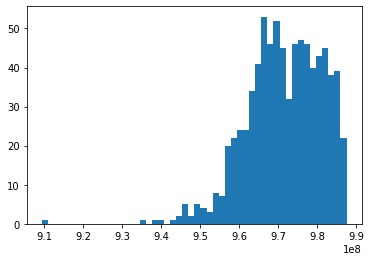

In [5]:
import matplotlib.pyplot as plt
plt.hist(scores, bins=50)
plt.show()

In [ ]:
# いい感じに裾がちっちゃくなってる！